In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import all necessary libraries. sklearn contains KNN functions; pandas offers data structures and operations for manipulating numerical tables; NumPy contains mathmatical functions and matrices; matplotlib is a visual extension of NumPy; seaborn plots graphs with the help of matplotlib and creates more advanced graphs.

Data from: https://www.moodysanalytics.com/solutions-overview/data/risk-data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

file = r'/gdrive/My Drive/CreditRiskData.xlsx'
df = pd.read_excel(file, index_col=None, na_values=['NA'], usecols="B:F")
 
print(df)

# Create feature and target arrays
X = pd.read_excel(file, index_col=None, na_values=['NA'], usecols="D:E")
y = pd.read_excel(file, index_col=None, na_values=['NA'], usecols="F")


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
        Loan Purpose Marital Status  Loan Amount  Months Employed Credit Risk
0          Education       Divorced       9690.0              2.0         red
1            New Car       Divorced       8270.0              2.0         red
2          Furniture       Divorced      13164.0              3.0         red
3    Small Appliance       Divorced      12496.0              1.0         red
4            New Car         Single      11462.0              8.0         red
..               ...            ...          ...              ...         ...
140          Repairs         Single       2744.0              0.0       green
141         Used Car         Single       3193.0              0.0       green
142          New Car       Divorced       2081.0              5.0       green
143            Other         Single      11457.0              0.0       green
144         Business       

Above code loads in the credit risk data set. It uses the loan amount and months employed as data and the classes KNN is deciding between is high or low risk credit.

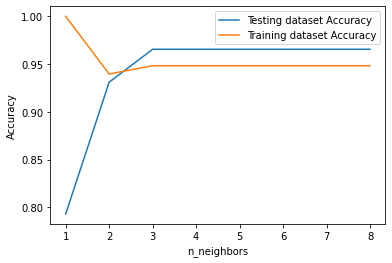

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

The above graph allows a user to read in data and determine the ideal number of neighbors for their data set for the KNN algorithm to most effectively classify data as.

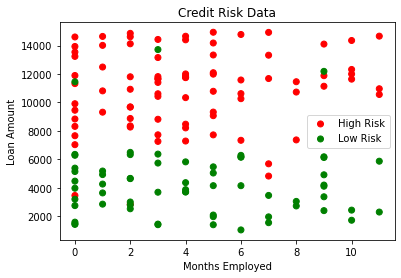

In [ ]:
#Loading Green+Red
df1 = pd.read_excel(file, 'Sheet2')
df2 = pd.read_excel(file, 'Sheet3')

#Plot high risk
x0r = df1['Months Employed'].astype(int)
x1r = df1['Loan Amount'].astype(int)
yr = df1['Credit Risk'].astype(str)

plt.scatter(x0r, x1r, c=yr, label = 'High Risk')

#Plot low risk
x0g = df2['Months Employed'].astype(int)
x1g = df2['Loan Amount'].astype(int)
yg = df2['Credit Risk'].astype(str)

plt.scatter(x0g, x1g, c=yg, label = 'Low Risk')

#Label axis
plt.xlabel('Months Employed')
plt.ylabel('Loan Amount')
plt.title('Credit Risk Data')

#Create legend
plt.legend()

plt.show()


The above graph is the given data classified by either being high or low risk clients. This is done with the training data but can be implemented by a user to plot the new data the user would like to check with i.e. if a client will be high or low risk.